# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

контест - https://contest.yandex.ru/contest/56884/run-report/102701136/
ник Егор Имайкин

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

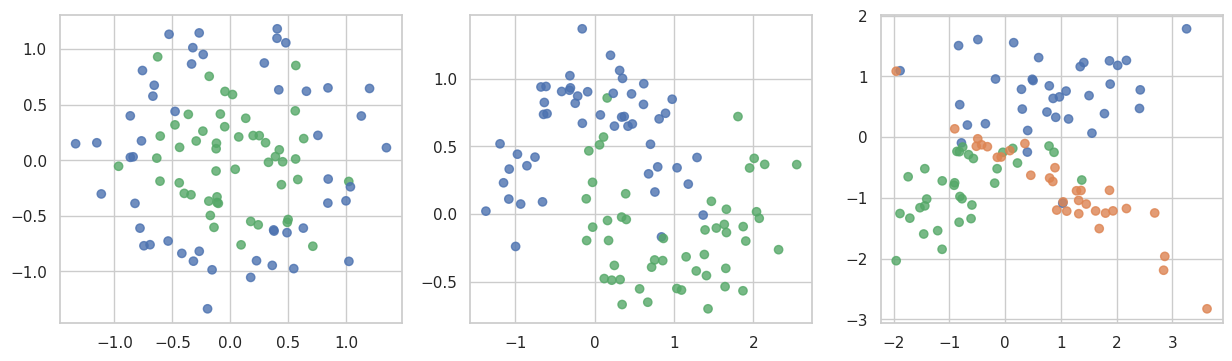

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

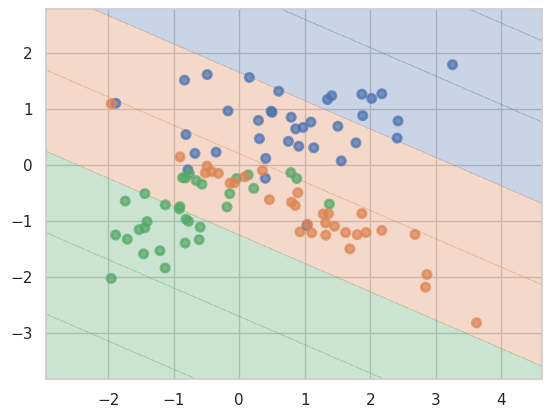

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

num of dataset: 1
train accuracy: 1.0
test accuracy: 0.7666666666666667

num of dataset: 2
train accuracy: 1.0
test accuracy: 0.8666666666666667

num of dataset: 3
train accuracy: 1.0
test accuracy: 0.8



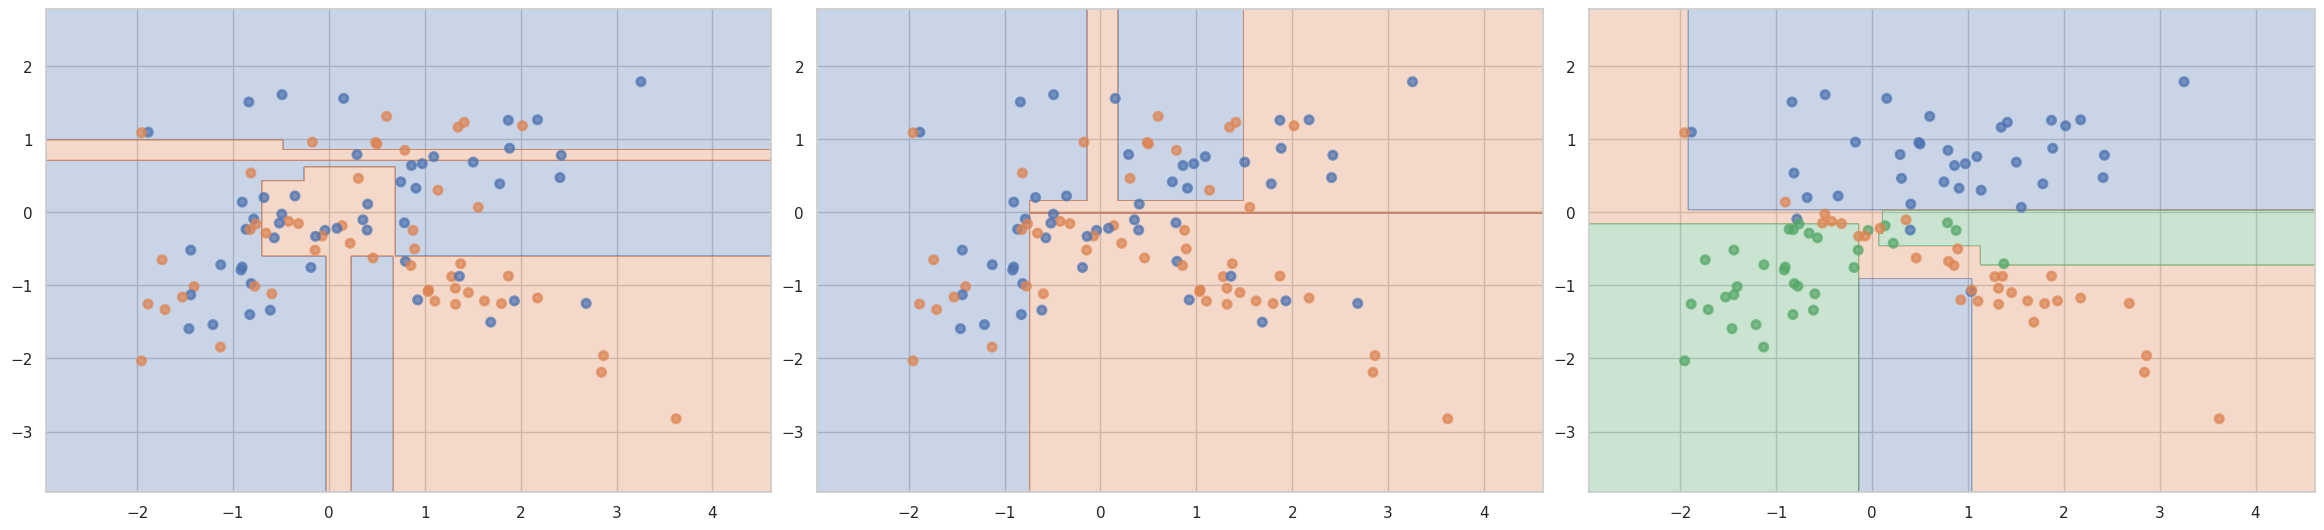

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score

plt.figure(figsize=(24, 6))
for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tr  = DecisionTreeClassifier().fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tr, X, y)

    print('num of dataset:', i + 1)
    print('train accuracy:', accuracy_score(y_train, tr.predict(X_train)))
    print('test accuracy:', accuracy_score(y_test, tr.predict(X_test)))
    print('')

__Ответ:__ деревья получаются переобученными: accuracy на трейне идеальный, а на тестовой ниже +  сложно построены поверхности классов, алгоритм подстраивается под трейн

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

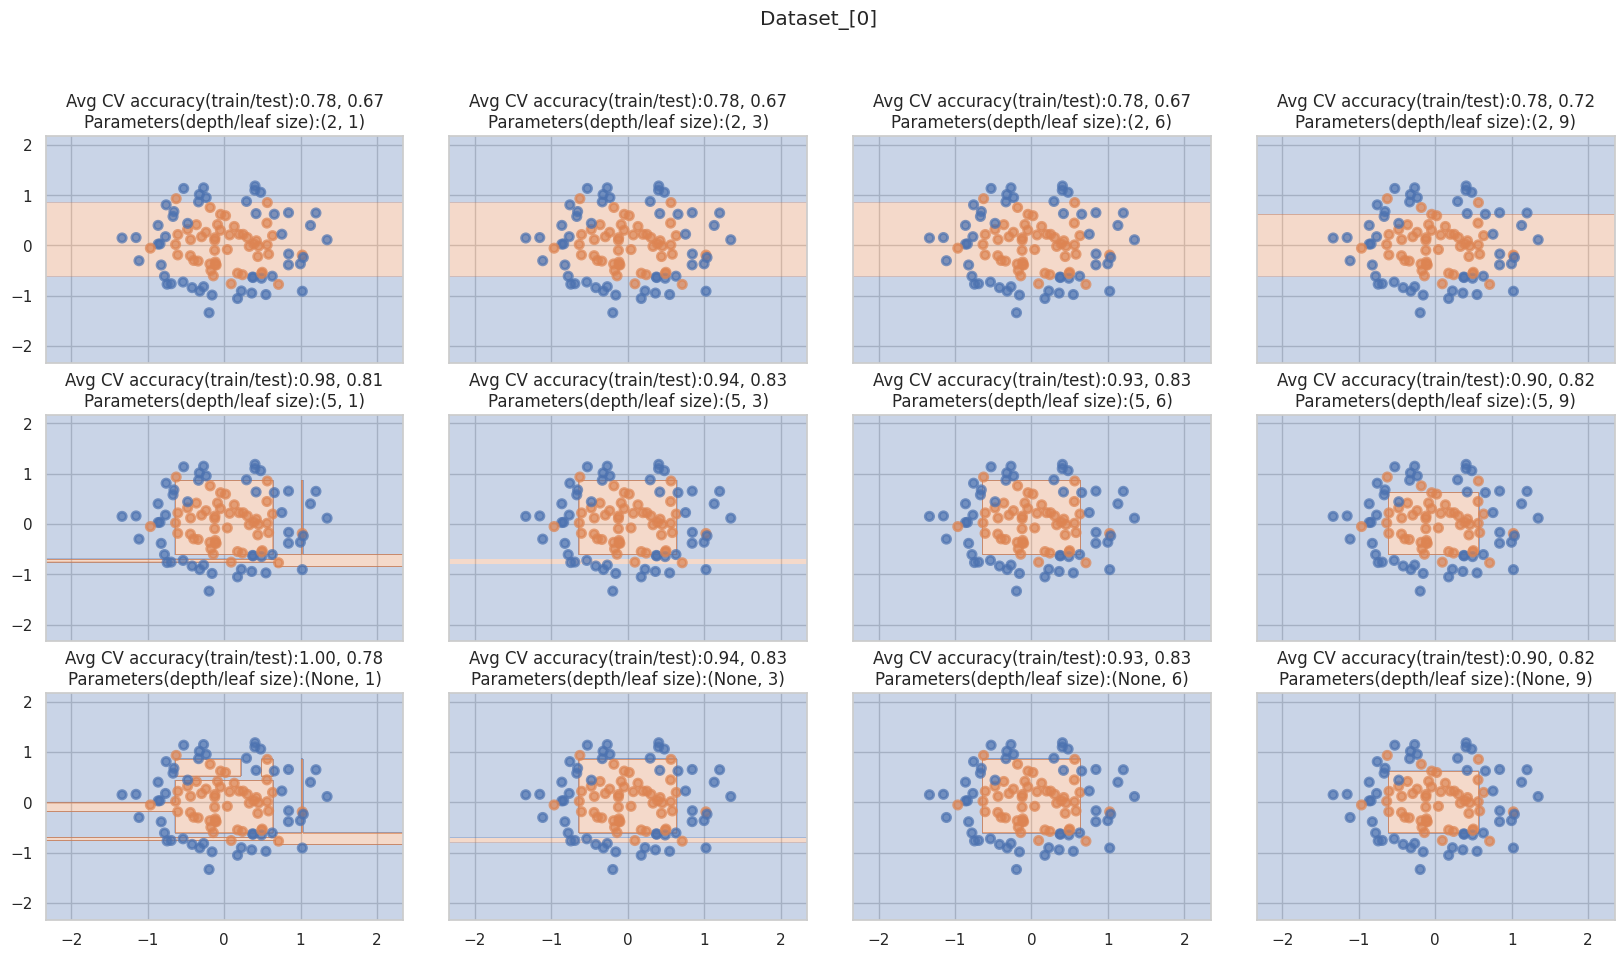

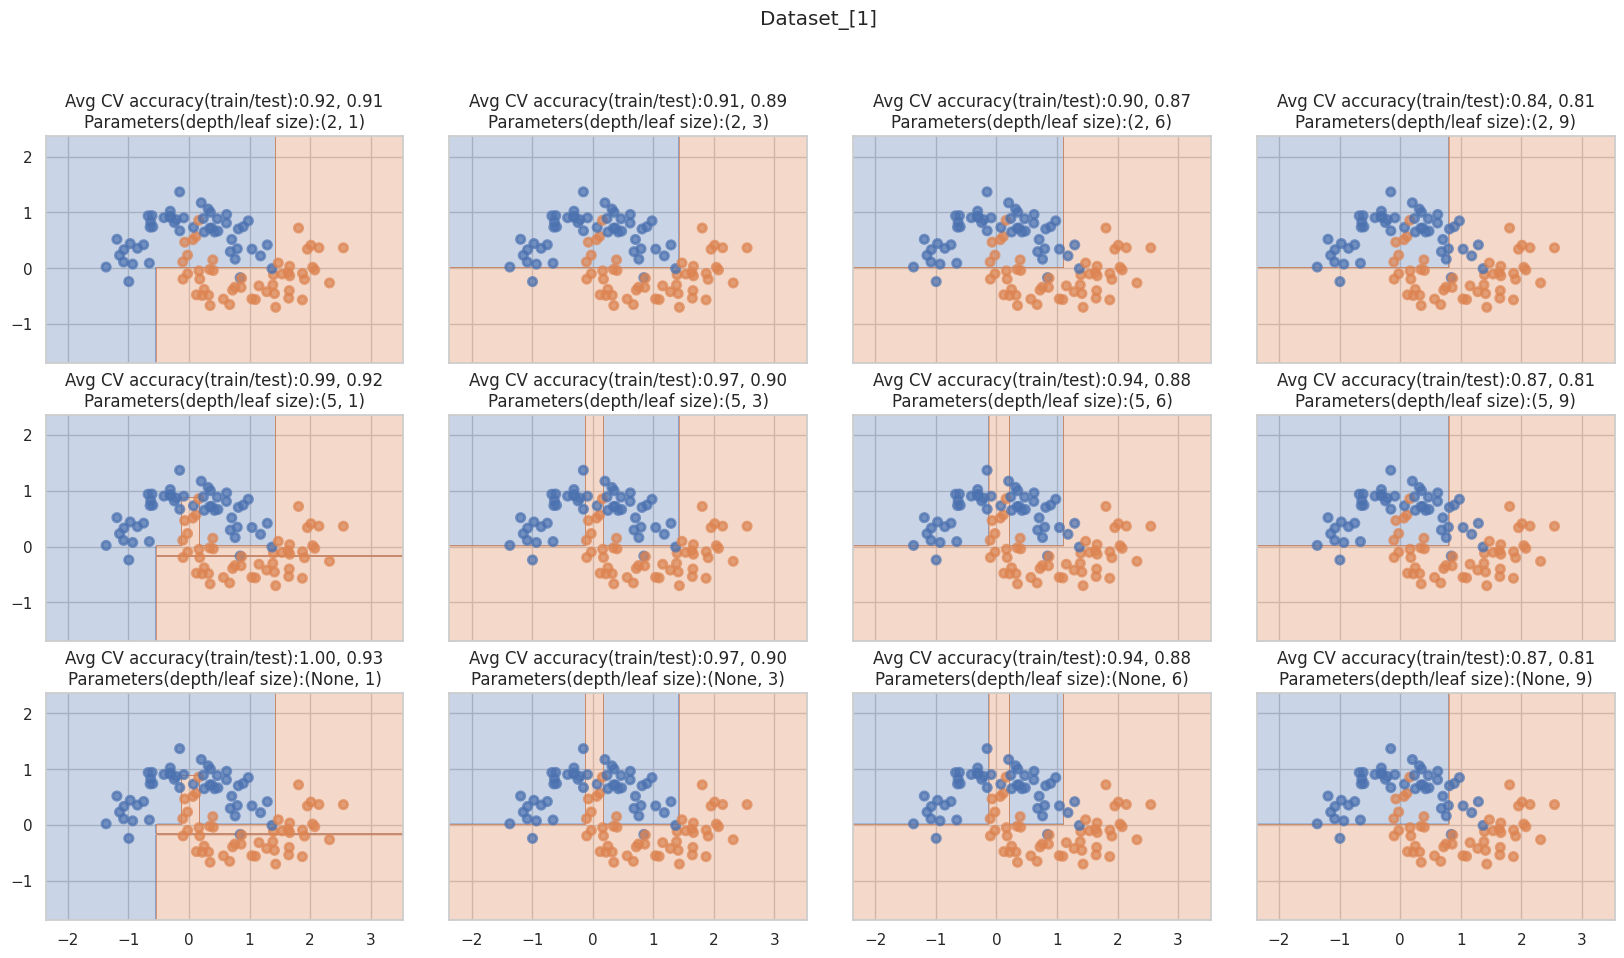

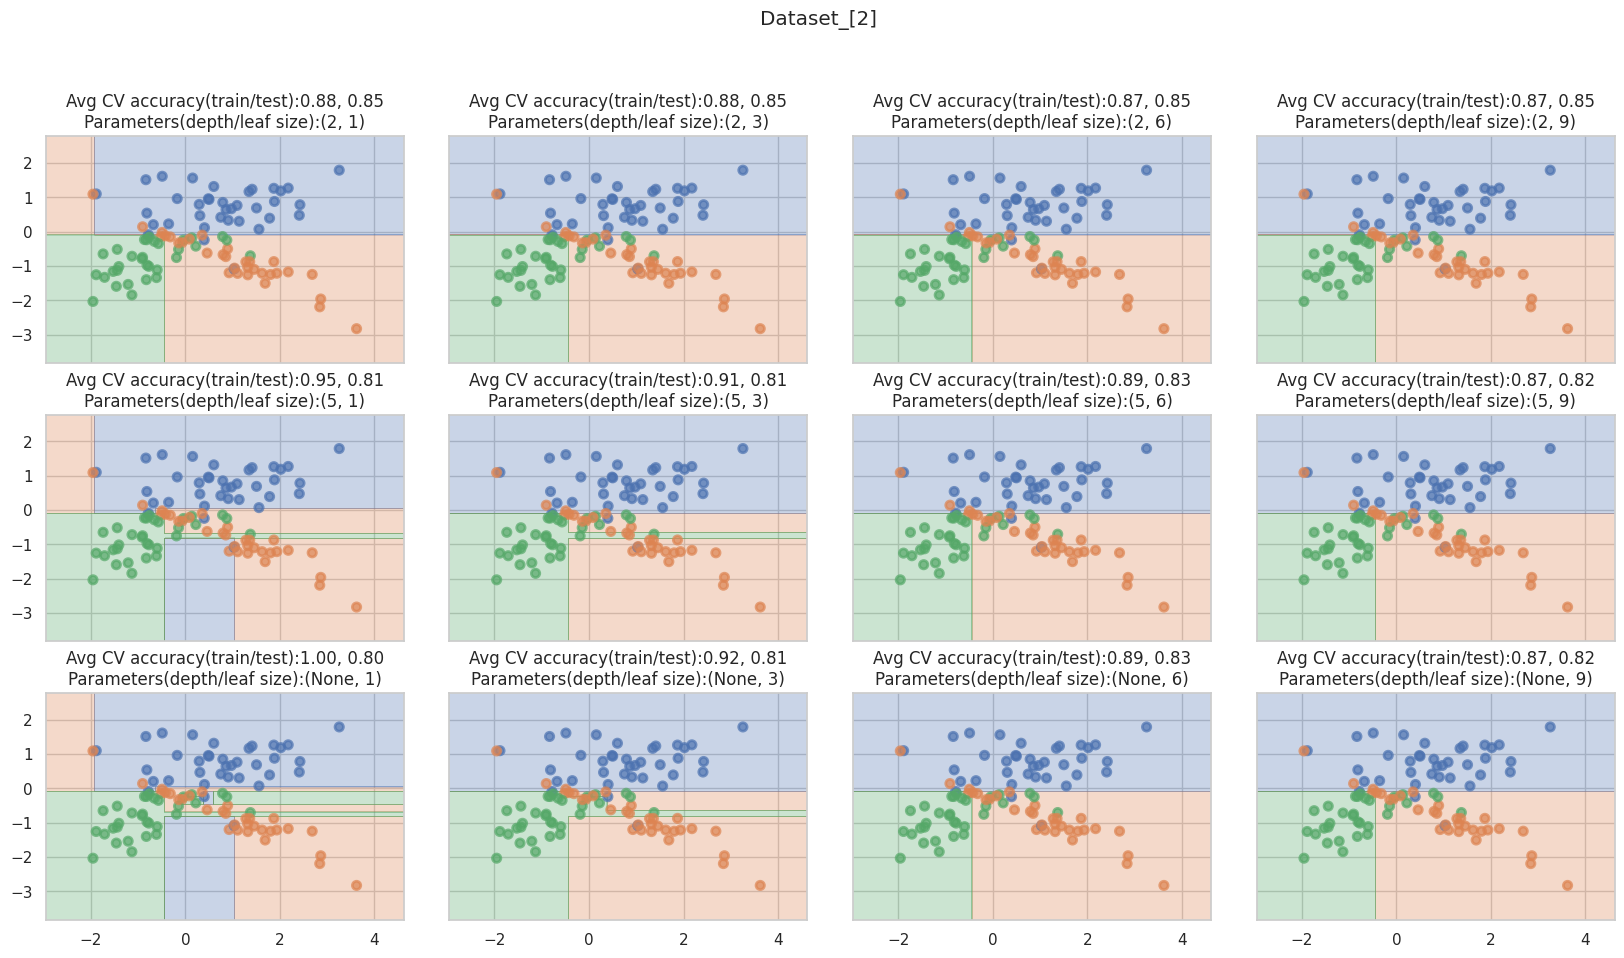

In [47]:
cv_clf = StratifiedKFold(n_splits=4, shuffle=True, random_state=77)

depths = [2, 5, None]
leaf_sz = [1, 3, 6, 9]

num_datasets = len(datasets)
num_samples = 100
accuracies = np.empty((num_datasets, len(depths)*len(leaf_sz), cv_clf.get_n_splits(), 2))
clf_res = np.empty((num_datasets, len(depths)*len(leaf_sz), num_samples // 4), dtype=int)
best_test_accuracy = 0
best_clf = None

for ds_id, dset in enumerate(datasets):
    plt.figure(figsize=(17, 10))
    plt.suptitle(f"Dataset_[{ds_id}]")
    for j, (dp, lf_sz) in enumerate(product(depths, leaf_sz)):
        plt.subplot(len(depths), len(leaf_sz), j+1)
        for k, (train_index, test_index) in enumerate(cv_clf.split(dset[0], dset[1])):
            clf = DecisionTreeClassifier(max_depth=dp, min_samples_leaf=lf_sz)
            clf.fit(dset[0][train_index], dset[1][train_index])
            y_pred_tr = clf.predict(dset[0][train_index])
            y_pred_ts = clf.predict(dset[0][test_index])
            sc_tr = accuracy_score(dset[1][train_index], y_pred_tr)
            sc_ts = accuracy_score(dset[1][test_index], y_pred_ts)
            if best_test_accuracy < sc_ts:
                clf_res[ds_id, j] = y_pred_ts
                best_clf = clf
            accuracies[ds_id, j, k, 0] = sc_tr
            accuracies[ds_id, j, k, 1] = sc_ts
        plot_surface(best_clf, dset[0], dset[1])
        avg_train_acc, avg_test_acc = accuracies[ds_id, j].mean(axis=0)
        plt.title(f"Avg CV accuracy(train/test):{avg_train_acc:.2f}, {avg_test_acc:.2f}\nParameters(depth/leaf size):{dp, lf_sz}")
        if j < len(leaf_sz)*(len(depths) - 1):
            plt.gca().axes.xaxis.set_ticklabels([])
        if j % len(leaf_sz) != 0:
            plt.gca().axes.yaxis.set_ticklabels([])


__Ответ:__ Когда количество объектов в листе уменьшается и глубина дерева увеличивается, это приводит к переобучению модели. Однако при постоянном количестве объектов в листе определенная максимальная глубина дерева демонстрирует наилучший результат. Это наблюдается на всех датасетах и представляет собой общее свойство.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv('students.csv')
df.head()


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


STG: best_threshold = 0.615, 	best_gini = -0.45397707504410645
SCG: best_threshold = 0.425, 	best_gini = -0.4650194980401841
STR: best_threshold = 0.365, 	best_gini = -0.46733829445545116
LPR: best_threshold = 0.39, 	best_gini = -0.4546683192930121
PEG: best_threshold = 0.335, 	best_gini = -0.0860656027491214


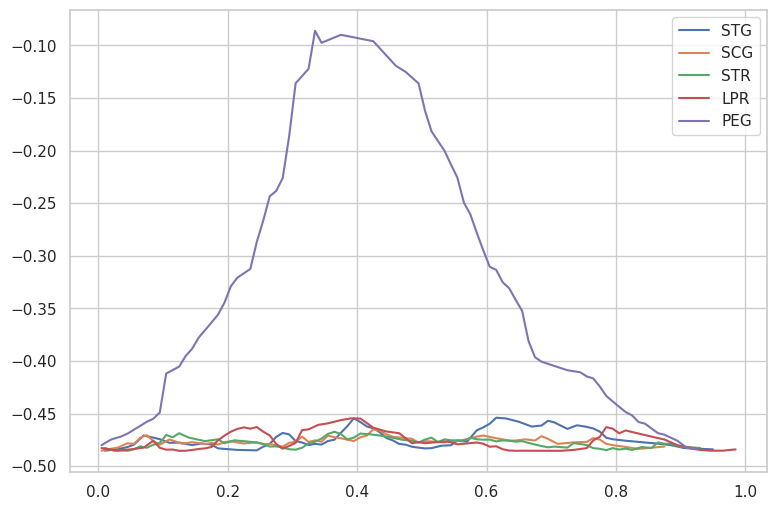

In [48]:
from hw5code import find_best_split
X, y = df.iloc[:, :-1], df.iloc[:, -1]

fig, ax = plt.subplots(figsize=(9, 6))

for column in X.columns:
    thresholds, ginis, best_threshold, best_gini = find_best_split(X.loc[:, column], y)
    print(f'{column}: best_threshold = {best_threshold}, \tbest_gini = {best_gini}')
    ax.plot(thresholds, ginis, label=column)

ax.legend()
plt.show()


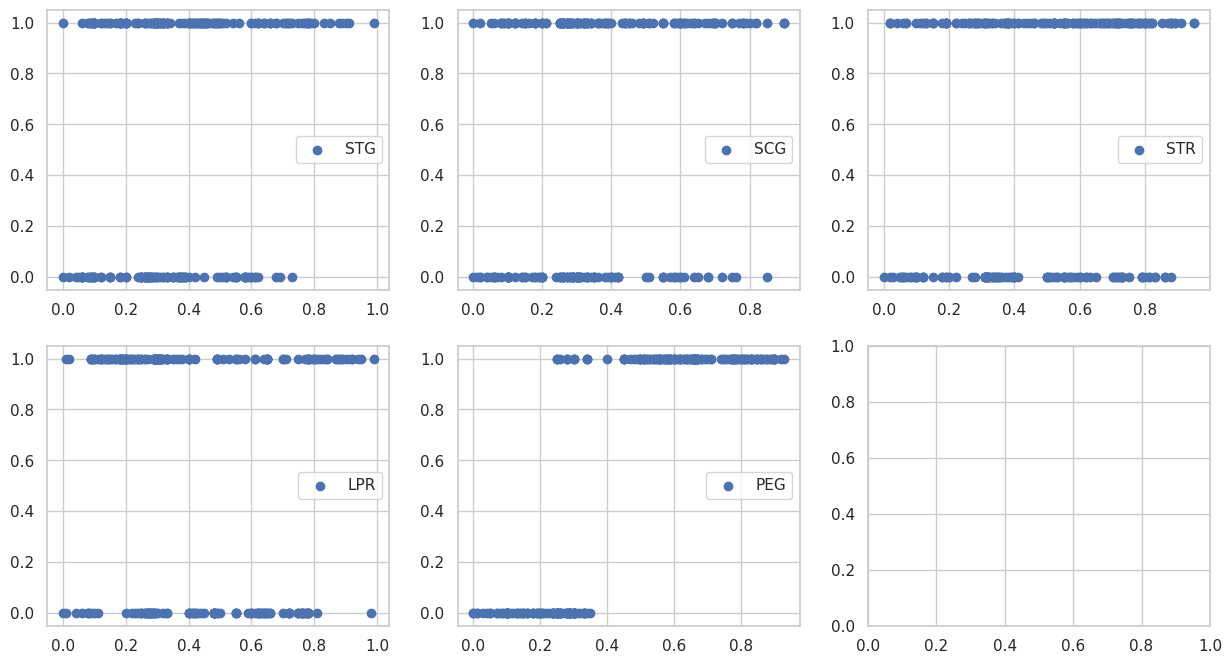

In [51]:
fig, axes = plt.subplots((len(X.columns) + 1) // 3, 3, figsize=(15, 8))

for i, column in enumerate(X.columns):
    axes[i // 3, i % 3].scatter(X.loc[:, column], y, label=column)
    axes[i // 3, i % 3].legend([column], loc='center right')

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Все графики подтверждают, что колонка PEG является наилучшим выбором для разделения, и это заметно с большим отрывом от остальных. График значений критерия имеет форму горба, что полностью соответствует ожиданиям; в то время как графики для незначимых признаков должны иметь практически ровную форму, так как изменение порогового значения не должно вносить существенных изменений в качество разделения.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

df_mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', names=[i for i in range(23)])
df_mushrooms = df_mushrooms.apply(LabelEncoder().fit_transform)
X, y = df_mushrooms.iloc[:, 1:], df_mushrooms.iloc[:, 0]
X, y = X.to_numpy(), y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [16]:
dt = DecisionTree(feature_types=['categorical' for _ in range(X.shape[1])])
dt.fit(X_train, y_train)
y_test_predict = dt.predict(X_test)
print(f'Accuracy on half: {accuracy_score(y_test, y_test_predict)}')

Accuracy on half: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [23]:
df_ttt = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
    names=list(range(10))
)
df_ttt = df_ttt.apply(LabelEncoder().fit_transform)
X_ttt = df_ttt.iloc[:, :-1].to_numpy()
y_ttt = df_ttt.iloc[:, -1].to_numpy()

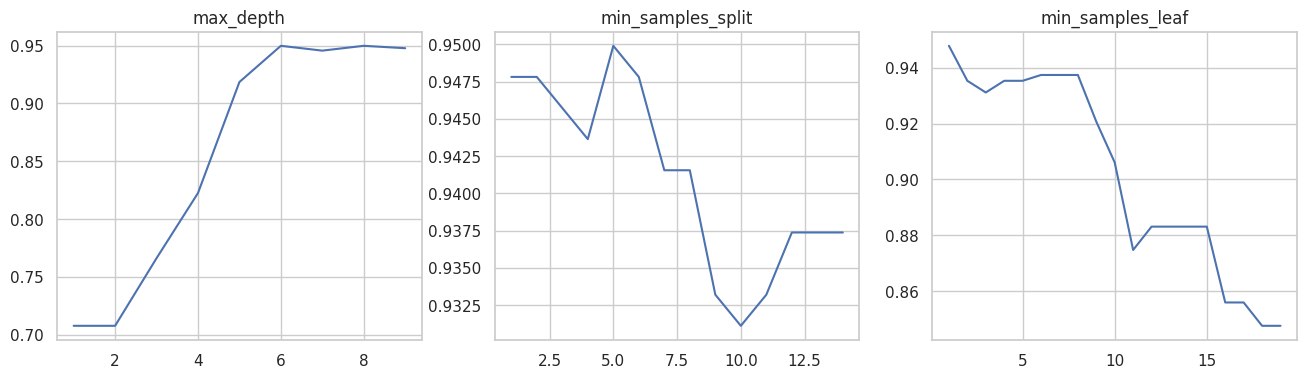

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_ttt, y_ttt, test_size=0.5, random_state=42)

params_grid = {
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 15),
    'min_samples_leaf': range(1, 20)
}

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, (param_name, param_grid) in enumerate(params_grid.items()):
    scores = []
    for param in param_grid:
        dt = DecisionTree(feature_types=['categorical'] * X_train.shape[1], **{param_name: param})
        dt.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, dt.predict(X_test)))

    axes[i].plot(param_grid, scores)
    axes[i].set_title(param_name)

plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [38]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from hw5code import DecisionTree

dfs, Xs, ys = dict(), dict(), dict()
dfs['mushrooms'] = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
    names=list(range(23))
)
dfs['mushrooms'] = dfs['mushrooms'].apply(LabelEncoder().fit_transform)
Xs['mushrooms'] = dfs['mushrooms'].iloc[:, 1:].to_numpy()
ys['mushrooms'] = dfs['mushrooms'].iloc[:, 0].to_numpy()

In [39]:
dfs['tic-tac-toe'] = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
    names=list(range(10))
)
dfs['tic-tac-toe'] = dfs['tic-tac-toe'].apply(LabelEncoder().fit_transform)
Xs['tic-tac-toe'] = dfs['tic-tac-toe'].iloc[:, :-1].to_numpy()
ys['tic-tac-toe'] = dfs['tic-tac-toe'].iloc[:, -1].to_numpy()

In [40]:
dfs['car'] = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    names=list(range(7))
)
dfs['car'].iloc[dfs['car'].iloc[:, -1] == 'unacc', -1] = 'acc'
dfs['car'].iloc[dfs['car'].iloc[:, -1] == 'vgood', -1] = 'good'

acc_num = dfs['car'].loc[dfs['car'].iloc[:, -1] == 'acc'].shape[0]
good_num = dfs['car'].loc[dfs['car'].iloc[:, -1] == 'good'].shape[0]
assert acc_num + good_num == dfs['car'].shape[0]

dfs['car'] = dfs['car'].apply(LabelEncoder().fit_transform)
Xs['car'] = dfs['car'].iloc[:, :-1].to_numpy()
ys['car'] = dfs['car'].iloc[:, -1].to_numpy()

In [41]:
dfs['nursery'] = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
    names=list(range(9))
)
dfs['nursery'].iloc[dfs['nursery'].iloc[:, -1] == 'not_recom', -1] = 'recommend'
dfs['nursery'].iloc[dfs['nursery'].iloc[:, -1] == 'very_recom', -1] = 'priority'
dfs['nursery'].iloc[dfs['nursery'].iloc[:, -1] == 'spec_prior', -1] = 'priority'

recommend_num = dfs['nursery'].loc[dfs['nursery'].iloc[:, -1] == 'recommend'].shape[0]
priority_num = dfs['nursery'].loc[dfs['nursery'].iloc[:, -1] == 'priority'].shape[0]
assert recommend_num + priority_num == dfs['nursery'].shape[0]

dfs['nursery'] = dfs['nursery'].apply(LabelEncoder().fit_transform)
Xs['nursery'] = dfs['nursery'].iloc[:, :-1].to_numpy()
ys['nursery'] = dfs['nursery'].iloc[:, -1].to_numpy()

In [42]:
accuracies_data = pd.DataFrame(columns=['DT real', 'DT categorical', 'DT real ohe', 'DTC sklearn'])
for df_name in dfs.keys():
    accuracies_data.loc[df_name, :] = [0.0 for _ in accuracies_data.columns]

In [43]:
for df_name, X in Xs.items():
    y = ys[df_name]

    models = dict()
    models['DT real'] = DecisionTree(feature_types=['real'] * X.shape[1])
    models['DT categorical'] = DecisionTree(feature_types=['categorical'] * X.shape[1])
    models['DT real ohe'] = Pipeline(steps=[
        ('ohe', OneHotEncoder(sparse=False)),
        ('DT', DecisionTree(feature_types=['real'], feature_shape_on_fit=True))
    ])
    models['DTC sklearn'] = DecisionTreeClassifier()

    for model_name, model in models.items():
        accuracies_data.loc[df_name, model_name] = np.mean(cross_val_score(
            model, X, y, cv=10, scoring=make_scorer(accuracy_score)
        ))

accuracies_data

,DT real,DT categorical,DT real ohe,DTC sklearn
mushrooms,0.999261,1.0,0.999631,0.965556
tic-tac-toe,0.467533,0.541458,0.543575,0.787336
car,0.942647,0.967546,0.919495,0.942707
nursery,0.999691,0.999537,0.999537,0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** В целом, с mushrooms и nursery всё оки, но на первом наборе данных sklearn'овский классификатор показывает результат немного хуже (предположительно из-за случайных перестановок, которые он использует внутри себя). На tic-tac-toe наши классификаторы значительно уступают: модель DT real показывает себя хуже всех, что вполне логично, учитывая что позиции в игре крестики-нолики сложно описать без использования категориального подхода. Наверное, если подольше покрутить параметры нашего DT (которые были в бонусе), то получилось бы добиться результатов, сходных с sklearn'ом. Но самым важным является общее значительное падение качества по сравнению с другими датасетами. Это может быть обусловлено двумя аспектами: малым количеством образцов и разбросом целевой переменной. Например, в датасете car тоже мало данных, но значение целевой переменной очень близко к 0 (или к 1, не так уж важно, главное, что близко (можно заметить, что в этих данных присутствует странное распределение целевой переменной, поэтому возможно данный метод решения этой задачи не подходит для него, но точно сказать сложно).). И даже несмотря на то, что данных там меньше, наши модели показывают намного лучшую точность, чем в tic-tac-toe - потому что классы кар несбалансированы и разброс в них меньше.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
#спасибо за ваш труд ! хорошего дня.вечера !

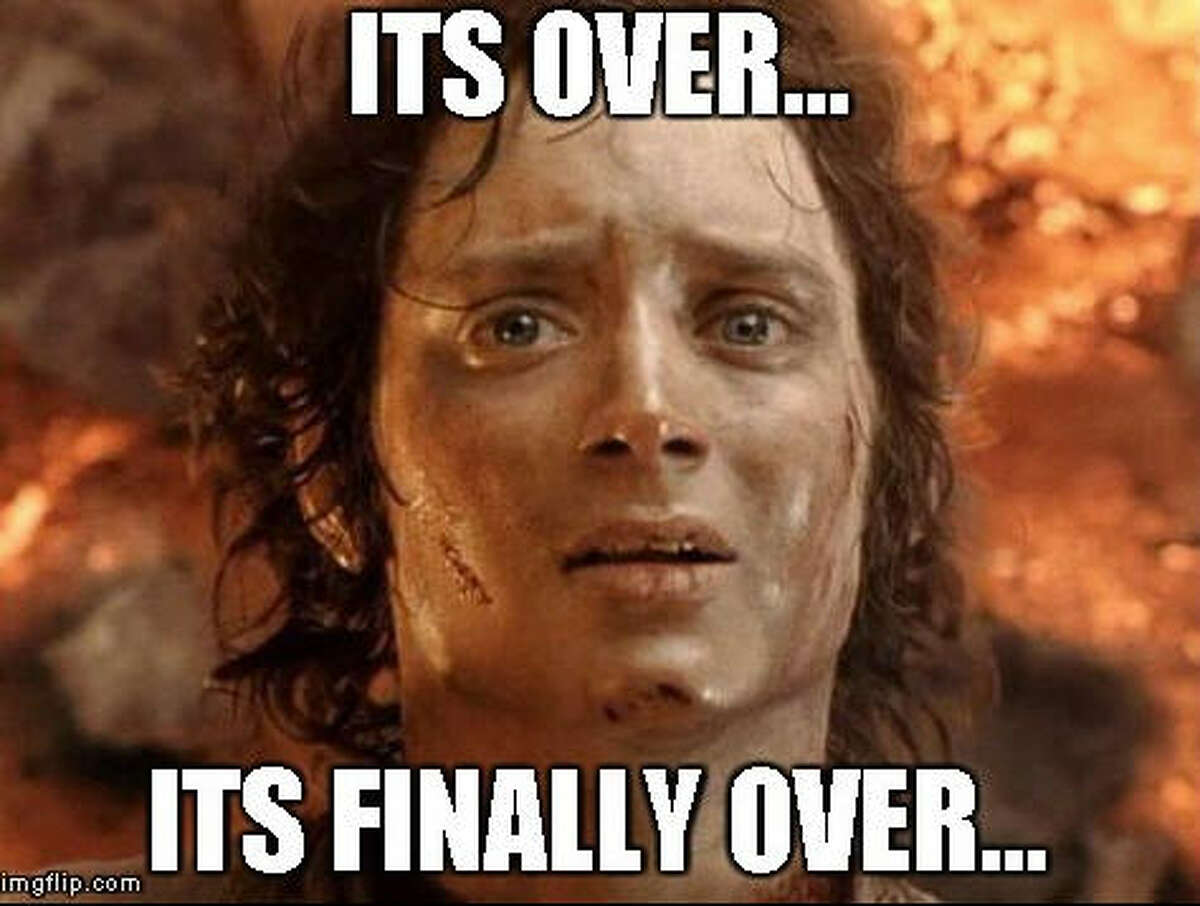